In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [3]:
train_dir = "../input/digit-recognizer/train.csv"
test_dir = "../input/digit-recognizer/test.csv"

df_train = pd.read_csv(train_dir)

df_test=pd.read_csv(test_dir)

In [4]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def show_image(data,m):
    img=((df_train.iloc[m][1:]).values[:]).reshape(28,28)
    lab=(df_train.iloc[m][0])
    
    return img / 255,lab

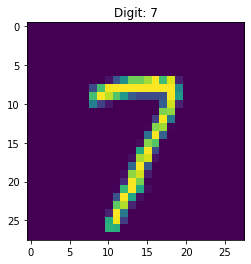

In [6]:
img,lab=show_image(df_train,18)


plt.title("Digit: {}".format(lab))
plt.imshow(img)
plt.show()

In [7]:
y_train = df_train['label']
X_train = df_train.drop(columns=['label'])

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

In [9]:
X_train = X_train / 255.0
X_val = X_val / 255.0



In [10]:
x=X_train.values.reshape(-1,28,28,1)
y=y_train.values

xval=X_val.values.reshape(-1,28,28,1)
yval=y_val.values


In [11]:

# Y_train  = pd.get_dummies(y_train).values
# Y_val  = pd.get_dummies(y_val).values
# Y_train.shape

In [12]:
model1=keras.Sequential([
    keras.layers.Conv2D(16,(3,3),padding="same",activation='relu',input_shape=(28,28,1),name='Conv2D_1'),
    keras.layers.MaxPooling2D(2,2,name='MaxPool_1'),
    
    keras.layers.Conv2D(32,(3,3),padding="same",activation='relu',input_shape=(28,28,1),name='Conv2D_2'),
    keras.layers.MaxPooling2D(2,2,name='MaxPool_2'),
    
    keras.layers.Conv2D(64,(3,3),padding="same",activation='relu',input_shape=(28,28,1),name='Conv2D_3'),
    keras.layers.MaxPooling2D(2,2,name='MaxPool_3'),
    
    keras.layers.Conv2D(128,(3,3),padding="same",activation='relu',input_shape=(28,28,1),name='Conv2D_4'),
    keras.layers.MaxPooling2D(2,2,name='MaxPool_4'),
    
    keras.layers.Flatten(name='FL'),
    keras.layers.Dense(512,activation='relu',name='FC_layer'),
    keras.layers.Dense(10,activation='softmax')
    
])

model1._name = "HimBA"

model1.summary()



Model: "HimBA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 14, 14, 16)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 7, 7, 32)          0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
MaxPool_3 (MaxPooling2D)     (None, 3, 3, 64)          0         
_________________________________________________________________
Conv2D_4 (Conv2D)            (None, 3, 3, 128)         73856 

2022-11-11 11:25:03.615490: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:

######################
opt=keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=["accuracy"])

################  fit

hist=model1.fit(x,y,validation_data = (xval, yval),epochs=10)

2022-11-11 11:25:04.042551: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
985/985 [==============================] - 18s 17ms/step - loss: 0.2456 - accuracy: 0.9213 - val_loss: 0.0709 - val_accuracy: 0.9766
Epoch 2/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.0597 - val_accuracy: 0.9810
Epoch 3/10
985/985 [==============================] - 17s 17ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0637 - val_accuracy: 0.9810
Epoch 4/10
985/985 [==============================] - 18s 18ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0531 - val_accuracy: 0.9832
Epoch 5/10
985/985 [==============================] - 16s 16ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0467 - val_accuracy: 0.9856
Epoch 6/10
985/985 [==============================] - 18s 18ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0502 - val_accuracy: 0.9870
Epoch 7/10
985/985 [==============================] - 17s 17ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0534 - val_accuracy:

model1= keras.Sequential([
    keras.layers.Dense(10,input_shape=(len(X_train.iloc[0,:]),), activation='sigmoid')
])


model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist=model1.fit(X_train,y_train.values[:],validation_data = (X_val, y_val),epochs=5)

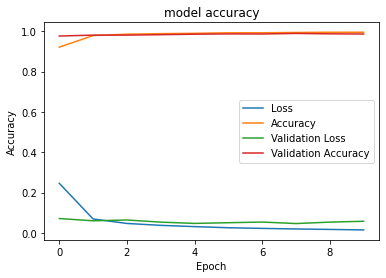

In [14]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss","Accuracy","Validation Loss","Validation Accuracy"])
plt.show()

In [15]:

y_pred=model1.predict(xval)
y_predicted_labels = [np.argmax(i) for i in y_pred]

Text(69.0, 0.5, 'Truth')

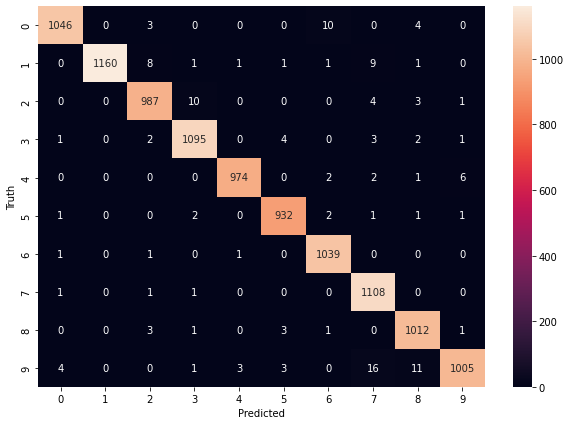

In [16]:
cm = tf.math.confusion_matrix(labels=yval,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [17]:
from sklearn.metrics import classification_report

print(classification_report(yval,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1063
           1       1.00      0.98      0.99      1182
           2       0.98      0.98      0.98      1005
           3       0.99      0.99      0.99      1108
           4       0.99      0.99      0.99       985
           5       0.99      0.99      0.99       940
           6       0.98      1.00      0.99      1042
           7       0.97      1.00      0.98      1111
           8       0.98      0.99      0.98      1021
           9       0.99      0.96      0.98      1043

    accuracy                           0.99     10500
   macro avg       0.99      0.99      0.99     10500
weighted avg       0.99      0.99      0.99     10500



In [18]:
X_test=(df_test/255).values.reshape(-1,28,28,1)

Y_hat = model1.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_hat, axis=1)

875/875 [==============================] - 5s 6ms/step


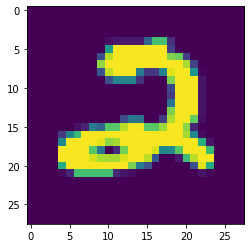

In [19]:
plt.imshow(X_test[0])

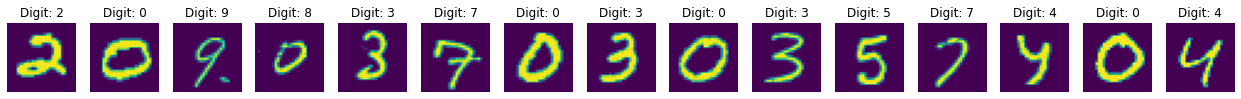

In [20]:
def show_image(data,lab,m):
    plt.figure(figsize=(22,2))
    for i in range(m):
        ax = plt.subplot(1, m, i+1)
        img=data[i]
        plt.imshow(img)
        plt.title("Digit: {}".format(lab[i]))
        plt.axis('off')
show_image(X_test,Y_pred,15)

In [21]:
results = pd.Series(Y_pred, name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)